In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt


data = pd.read_csv("../datasets/Project_datasets/intrinsic_cluster_analysis.csv")
data

,Unnamed: 0,Delay,Rheobase,Rin,tau,Max,Unnamed: 6
0,1,27.900000,75.80,258.000,12.3000,143.0,NaN
1,2,331.900000,44.80,412.000,13.4708,66.0,NaN
2,3,134.800000,36.00,536.500,23.9807,64.0,NaN
3,4,176.800000,26.60,692.000,27.1597,25.0,NaN
4,5,41.420000,104.00,318.632,13.0589,30.0,NaN
...,...,...,...,...,...,...,...
62,63,332.633343,90.67,192.530,5.6200,56.0,NaN
63,64,193.566657,146.67,270.960,11.8900,31.0,NaN
64,65,48.466670,92.67,231.920,9.0900,38.4,NaN
65,66,21.166670,412.67,127.940,12.0100,0.0,NaN


In [2]:
cleaned_data = data.drop(['Unnamed: 0'], axis = 1) #drop unwanted columns
cleaned_data.rename(columns={'Unnamed: 6':'Putative Cell Type'}, inplace=True) #Rename Column with putative cell type
cleaned_data.loc[0:16, 'Putative Cell Type'] = 'VIP+'
cleaned_data.loc[17:45, 'Putative Cell Type'] = 'NDNF-Like'
cleaned_data.loc[46:, 'Putative Cell Type'] = 'Jini Cells'
print(cleaned_data.info())
cleaned_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Delay               67 non-null     float64
 1   Rheobase            67 non-null     float64
 2   Rin                 67 non-null     float64
 3   tau                 67 non-null     float64
 4   Max                 67 non-null     float64
 5   Putative Cell Type  67 non-null     object 
dtypes: float64(5), object(1)
memory usage: 3.3+ KB
None


,Delay,Rheobase,Rin,tau,Max,Putative Cell Type
0,27.90,75.8,258.000,12.3000,143.0,VIP+
1,331.90,44.8,412.000,13.4708,66.0,VIP+
2,134.80,36.0,536.500,23.9807,64.0,VIP+
3,176.80,26.6,692.000,27.1597,25.0,VIP+
4,41.42,104.0,318.632,13.0589,30.0,VIP+


In [4]:
def show_boxplot(df):
    plt.rcParams['figure.figsize'] = [14,6]
    sns.boxplot(data = df, orient="v")
    plt.title("Outliers Distribution", fontsize = 16)
    plt.ylabel("Range", fontweight = 'bold')
    plt.xlabel("Attributes", fontweight = 'bold')

    Delay  Rheobase      Rin      tau    Max
0   27.90      75.8  258.000  12.3000  143.0
1  331.90      44.8  412.000  13.4708   66.0
2  134.80      36.0  536.500  23.9807   64.0
3  176.80      26.6  692.000  27.1597   25.0
4   41.42     104.0  318.632  13.0589   30.0
Scaled data shape is (67, 5)


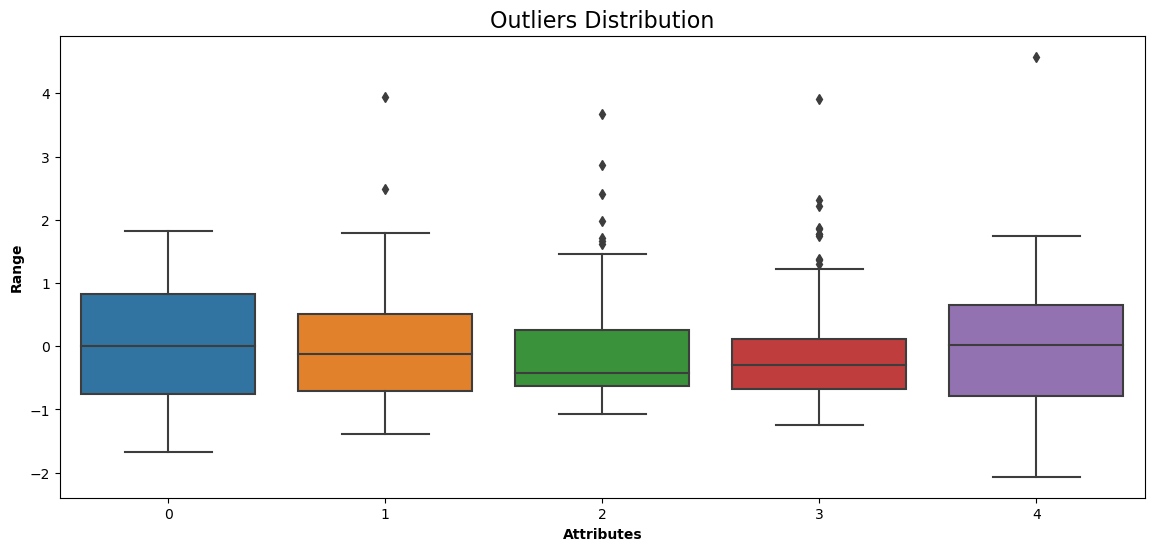

In [5]:
from sklearn.preprocessing import StandardScaler

data_scaler = StandardScaler()

df = pd.DataFrame(cleaned_data.iloc[:,:5]) #dropping putative cell type as scaling will affect it weirdly
print (df.head())

scaled_data = data_scaler.fit_transform(df)
print ('Scaled data shape is',scaled_data.shape) #The shape of the data remains the same as the cleaned data (46 rows, 5 columns) because the normalization does not affect the same of the data.

show_boxplot(scaled_data)

In [9]:
#Re-append 'putative cell type' column onto data frame
df_scaled_data = pd.DataFrame(scaled_data)
df_scaled_data['Putative Cell Type'] = cleaned_data['Putative Cell Type']
df_scaled_data.rename(columns={0:'Delay', 1:'Rheobase', 2:'Input Resistance', 3:'Decay Tau', 4:'Max Firing'}, inplace=True) 
df_scaled_data.head()

,Delay,Rheobase,Input Resistance,Decay Tau,Max Firing,Putative Cell Type
0,-1.597525,-0.532602,-0.435153,-0.318385,4.578711,VIP+
1,0.701864,-0.944776,0.312130,-0.156236,1.002232,VIP+
2,-0.788957,-1.061780,0.916265,1.299325,0.909337,VIP+
3,-0.471278,-1.186761,1.670826,1.739598,-0.902127,VIP+
4,-1.495263,-0.157658,-0.140937,-0.213282,-0.669888,VIP+


## Currently data is 5-D, Run PCA to reduce dimensions

### Prepare Data & Taregt

In [10]:
# prepare the data
X = df_scaled_data.iloc[:,0:5]
print(X.shape)

# prepare the target
target = df_scaled_data.iloc[:,5]
target

(67, 5)


0           VIP+
1           VIP+
2           VIP+
3           VIP+
4           VIP+
         ...    
62    Jini Cells
63    Jini Cells
64    Jini Cells
65    Jini Cells
66    Jini Cells
Name: Putative Cell Type, Length: 67, dtype: object

### Run Co-variance Matrix

In [11]:
features = X.T # flip rows and columns
print("Features shape is", features.shape)
print()
print("Features are:")
print (features[1])
# Covariance matrix is the variance of each variable in relation to all others
# diagonals are variances with itself, hence is just a measure of variance
# diagonals are identical, so matrix is symmetrical, thanks to the scaling (mean-centering)
cov_matrix = np.cov(features)
print()
print("Cov matrix shape is", cov_matrix.shape)
print()
print("Cov matrix is")
cov_matrix

Features shape is (5, 67)

Features are:
Delay               0.701864
Rheobase           -0.944776
Input Resistance    0.312130
Decay Tau          -0.156236
Max Firing          1.002232
Name: 1, dtype: float64
Cov matrix shape is (5, 5)

Cov matrix is


array([[ 1.01515152, -0.01780906, -0.24247339, -0.27041032,  0.08900024],
       [-0.01780906,  1.01515152, -0.6654723 , -0.53543011,  0.13060562],
       [-0.24247339, -0.6654723 ,  1.01515152,  0.92882034, -0.26405607],
       [-0.27041032, -0.53543011,  0.92882034,  1.01515152, -0.29634951],
       [ 0.08900024,  0.13060562, -0.26405607, -0.29634951,  1.01515152]])

<Axes: >

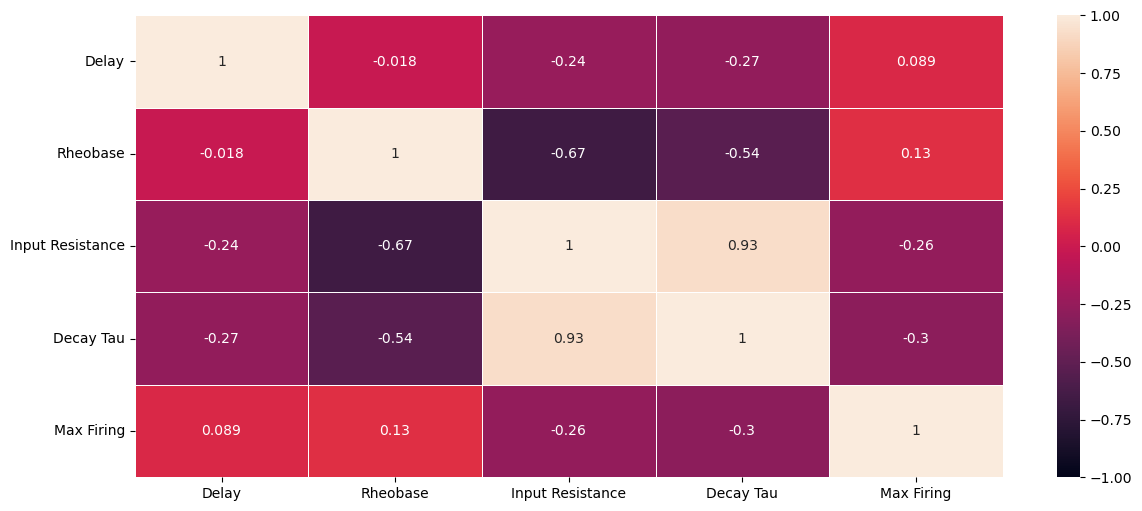

In [18]:
sns.heatmap(cov_matrix, 
            xticklabels=['Delay', 'Rheobase', 'Input Resistance', 'Decay Tau', 'Max Firing'], 
            yticklabels = ['Delay', 'Rheobase', 'Input Resistance', 'Decay Tau', 'Max Firing'], 
            linewidth=.5, 
            vmin = -1.0, 
            vmax = 1.0,
            annot=True
           )

### At this stage I could drop values that have a high co-variance but since this is already known (i.e. these are co-dependent biophysical properties i'm not going to at this stage)

### Run Eigen-decomposition & Data Transformation

In [19]:
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)
print('The eigen values are')
print (eigen_values)
print('The eigen vectors are')
print (eigen_vectors)

The eigen values are
[2.6196065  1.04111819 0.90869641 0.43550276 0.07083371]
The eigen vectors are
[[-0.1962199   0.84997514  0.35034001  0.34081103 -0.01223679]
 [-0.45801736 -0.45328465  0.12043448  0.73708445 -0.16418029]
 [ 0.59542848  0.06779803 -0.11376062  0.26384058 -0.74720481]
 [ 0.57730322 -0.02754604 -0.07052344  0.49668378  0.64365664]
 [-0.25279194  0.25830201 -0.91915308  0.15571683  0.0169173 ]]


In [20]:
n_components = 2 # you can select any number of components
eigenvector_subset = eigen_vectors[:, 0:n_components]
eigenvector_subset

array([[-0.1962199 ,  0.84997514],
       [-0.45801736, -0.45328465],
       [ 0.59542848,  0.06779803],
       [ 0.57730322, -0.02754604],
       [-0.25279194,  0.25830201]])

In [21]:
print("Subset shape", eigenvector_subset.shape, eigenvector_subset.transpose().shape)
print("Scaled shape", X.shape, X.transpose().shape)

X_reduced = np.dot(eigenvector_subset.transpose(), X.transpose()).transpose()
print("Transformed shape untransposed", np.dot(eigenvector_subset.transpose(), X.transpose()).shape)
print("Transformed shape", X_reduced.shape)
print("Transformed sample", X_reduced[:10])

Subset shape (5, 2) (2, 5)
Scaled shape (67, 5) (5, 67)
Transformed shape untransposed (2, 67)
Transformed shape (67, 2)
Transformed sample [[-1.04296096  0.04552177]
 [ 0.13730334  1.30916358]
 [ 1.70692414  0.07190773]
 [ 2.86321497 -0.03029556]
 [ 0.3279065  -1.37618608]
 [ 1.86399183 -0.98225805]
 [ 2.77396582 -0.18428092]
 [ 2.90228611 -0.9483066 ]
 [ 3.24659359  0.137223  ]
 [ 2.95947637 -0.31202469]]


<Axes: xlabel='PC1', ylabel='PC2'>

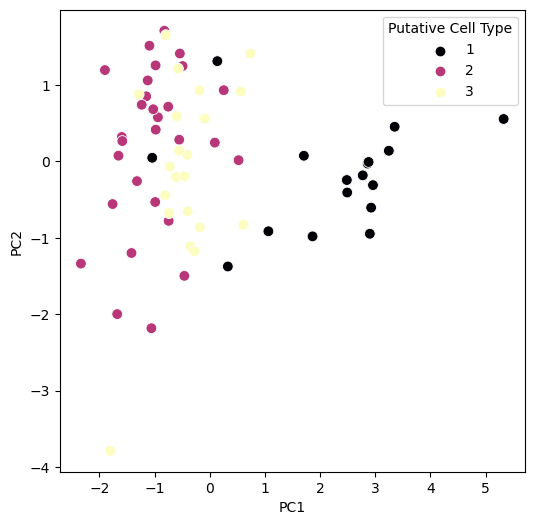

In [23]:
# Creating a Pandas DataFrame of reduced Dataset
principal_df = pd.DataFrame(X_reduced, columns = ['PC1','PC2'])
 
# Concat it with target variable to create a complete Dataset
principal_df = pd.concat([principal_df, pd.DataFrame(target)], axis=1)

plt.figure(figsize=(6,6))
sns.scatterplot(data=principal_df, x='PC1', y='PC2', hue='Putative Cell Type', s=60, palette='magma')

In [23]:
explained_variances = []
for i in range(len(eigen_values)):
    explained_variances.append(eigen_values[i] / np.sum(eigen_values))
 
print(np.sum(explained_variances))
print(explained_variances)

1.0
[0.5161015785932799, 0.20511582327043107, 0.1790267556168585, 0.08580054359749098, 0.013955298921939549]


In [22]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
from sklearn.decomposition import PCA
X = df_scaled_data.drop('Putative Cell Type', axis=1)
y = df_scaled_data['Putative Cell Type']
pca = PCA(n_components=5)

pca.fit_transform(X)

array([[-1.04296096e+00, -4.55217663e-02,  4.76040021e+00,
        -4.96992414e-01, -3.04668736e-01],
       [ 1.37303339e-01, -1.30916358e+00,  8.13586981e-01,
        -2.96359184e-01,  1.70307143e-01],
       [ 1.70692414e+00, -7.19077326e-02,  1.43596531e+00,
        -2.28061163e-02, -3.51043055e-01],
       [ 2.86321497e+00,  3.02955615e-02, -2.08401334e-01,
         1.29025593e-01, -5.66028147e-02],
       [ 3.27906499e-01,  1.37618608e+00, -1.03966092e-01,
        -8.73240354e-01, -8.77549076e-04],
       [ 1.86399183e+00,  9.82258052e-01, -7.10199967e-01,
        -7.43208287e-01,  7.39717659e-01],
       [ 2.77396582e+00,  1.84280918e-01,  8.08830972e-02,
         1.83886131e-03, -2.55251149e-01],
       [ 2.90228611e+00,  9.48306598e-01, -7.28198603e-01,
        -5.53945988e-01,  2.35146716e-01],
       [ 3.24659359e+00, -1.37222996e-01,  3.80955381e-01,
         5.58221365e-01, -2.02958510e-01],
       [ 2.95947637e+00,  3.12024692e-01, -6.39970472e-02,
         1.30914986e-01

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

clf = RandomForestClassifier(n_estimators=100, max_depth=4)

clf.fit(X_train, y_train)

print("Accuracy on training set {}".format(clf.score(X_train, y_train)))

y_pred = clf.predict(X_test)

print("Accuracy on test set {}".format(accuracy_score(y_test, y_pred)))

Accuracy on training set 1.0
Accuracy on test set 0.7647058823529411


In [28]:
print ('The PCA explained variance is', pca.explained_variance_, 'While the variance ratio is', pca.explained_variance_ratio_)

The PCA explained variance is [2.6196065  1.04111819 0.90869641 0.43550276 0.07083371] While the variance ratio is [0.51610158 0.20511582 0.17902676 0.08580054 0.0139553 ]


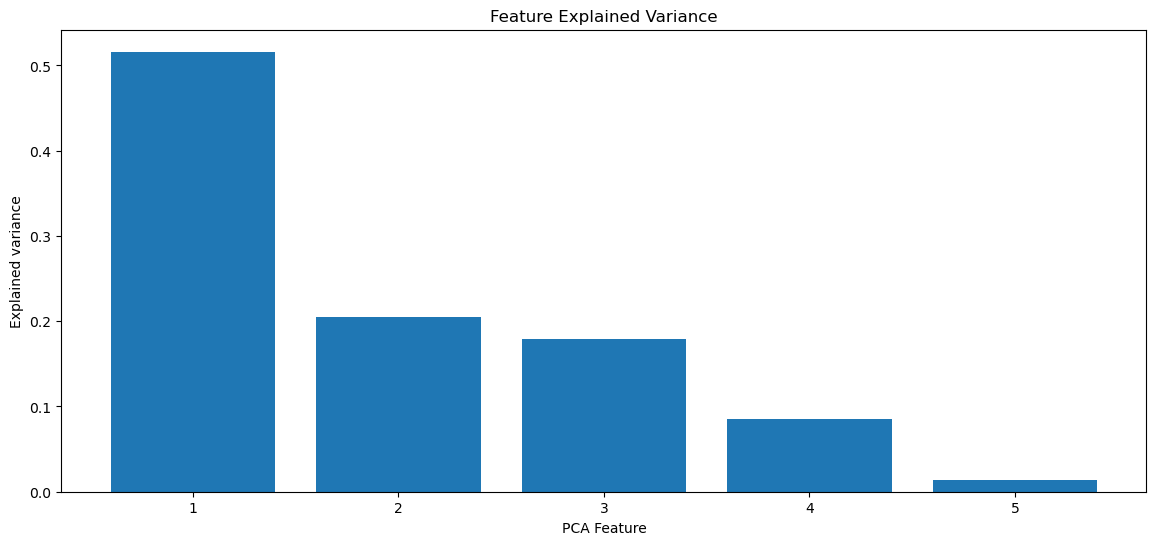

In [29]:
# Bar plot of explained_variance
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()